In [1]:
import os
import matplotlib.pyplot as plt
import pathlib
import PIL

# Data Manipulation
import numpy as np
import pandas as pd

# Deep Learning
import tensorflow as tf
import tensorflow_datasets as tfds

# TensorFlow
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import models, layers


# Sklearn
from sklearn import set_config
set_config(display="diagram")

from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline


# 1 - DATA MANIPULATION
import pandas as pd
import numpy as np

# 2 - DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# 3 - STATISTICS
from statsmodels.graphics.gofplots import qqplot

# 4 - MACHINE LEARNING
## 4.1 - Preprocessing

### 4.1.1 - Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


### 4.1.3 - Crossvalidation, Training, Model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Make all figures tiny for readability purpose
from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)
import macrobond_data_api as mda
from macrobond_data_api.web import WebClient

from macrobond_data_api.web import WebClient
from macrobond_data_api.common.types import SearchFilter

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import numpy as np

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
import pandas as pd


In [2]:
total_df = pd.read_csv('total_df_w_fred_gdp.csv')
# ensure the dfs are the same size, match the last value of X to y
X = total_df.drop(columns=['inflation','Unnamed: 0'])[:-21] # (8885, 651)  1990-01-01 to 2024-01-31 8871 non-null
y = total_df['inflation'].values[:-21]
new_data = pd.DataFrame(total_df.drop(columns=['inflation','Unnamed: 0']).iloc[-21:])
y= y[-X.shape[0]:]

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Build the preprocessing pipeline
preproc = make_pipeline(
    SimpleImputer(strategy='mean'),# Impute missing values via linear interpolation
    StandardScaler()  # Standardize features by removing the mean and scaling to unit variance
)
X_preproc = pd.DataFrame(preproc.fit_transform(X))
new_data_preproc = pd.DataFrame(preproc.transform(new_data))

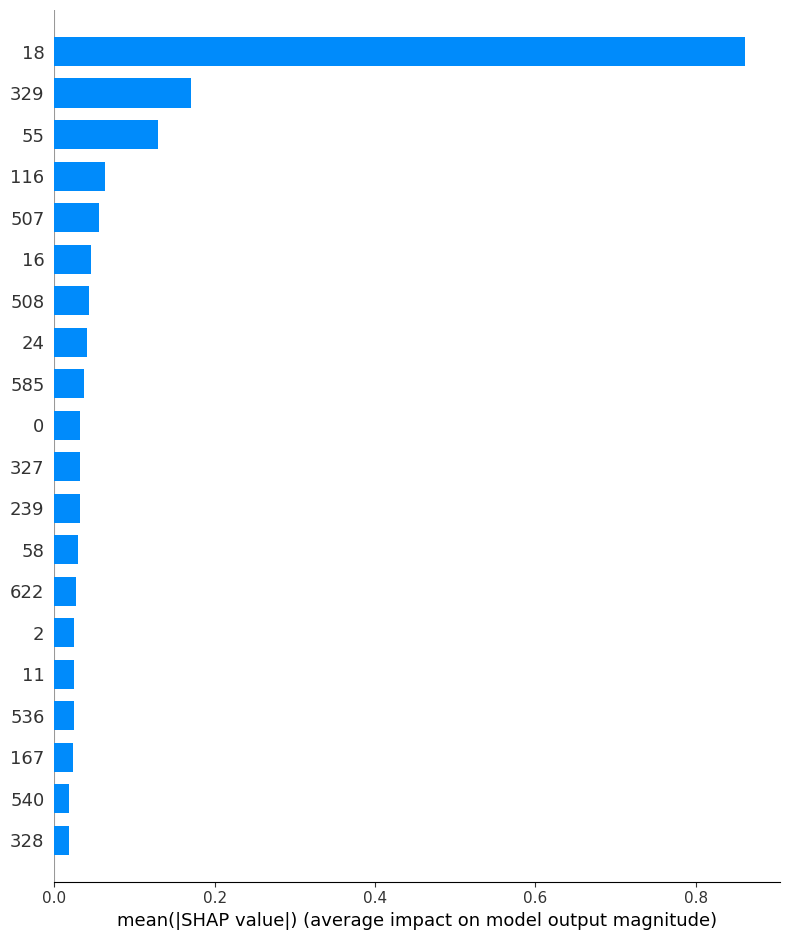

In [5]:
# Feature Selection
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_preproc, y, test_size=0.2)

# Train a model (Random Forest in this case)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP values to understand feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [6]:
# Ensure X_test is a DataFrame with column names
if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns.tolist()
else:
    # Handle cases where X_test might not be a DataFrame
    feature_names = ['Feature_' + str(i) for i in range(X_test.shape[1])]

# Compute the mean absolute SHAP values for each feature to get a measure of importance
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([feature_names, shap_sum.tolist()]).T
importance_df.columns = ['Feature', 'SHAP Importance']
importance_df = importance_df.sort_values('SHAP Importance', ascending=False)

# Display the feature importance


In [7]:
# Assuming 'X' is your DataFrame and you have the list of feature indices (1-based) from your model's output
# Take these and put them into a ML model
top_30_feature_indices = [
    18, 329, 55, 116, 16, 24, 508, 507,
    2, 0, 536, 239, 328, 327, 58, 131,
    11, 562, 622, 330, 326, 585, 10, 203,
    17, 6, 167, 20, 162, 664
]

# Convert from 1-based to 0-based indexing
top_30_feature_indices_zero_based = [i-1 for i in top_30_feature_indices]

# Select the columns using .iloc
X_top_30 = X_preproc.iloc[:, top_30_feature_indices_zero_based]
new_data_30 = new_data_preproc.iloc[:, top_30_feature_indices_zero_based]


Int64Index([ 17, 328,  54, 115,  15,  23, 507, 506,   1, 673, 535, 238, 327,
            326,  57, 130,  10, 561, 621, 329, 325, 584,   9, 202,  16,   5,
            166,  19, 161, 663],
           dtype='int64')

In [ ]:
# Ensure X_test is a DataFrame with column names
if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns.tolist()
else:
    # Handle cases where X_test might not be a DataFrame
    feature_names = ['Feature_' + str(i) for i in range(X_test.shape[1])]

# Compute the mean absolute SHAP values for each feature to get a measure of importance
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([feature_names, shap_sum.tolist()]).T
importance_df.columns = ['Feature', 'SHAP Importance']
importance_df = importance_df.sort_values('SHAP Importance', ascending=False)

# Display the feature importance

